# import libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import Datasets

In [3]:
data=pd.read_csv("C:\\Users\\byral\\OneDrive\\Desktop\\heart.csv")

# Knowing information about dataset(with method .info())

In [4]:
data.shape

(918, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             915 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [6]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

# check for missing value

In [7]:
data.isnull().sum()

Age               3
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Cleaning Datasets

In [8]:
data.dropna(inplace=True)
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
data.shape

(915, 12)

# See the Categorical Values

In [10]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45.0,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54.0,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37.0,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48.0,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
10,37.0,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
11,58.0,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
12,39.0,M,ATA,120,204,0,Normal,145,N,0.0,Up,0


# visualising dataset

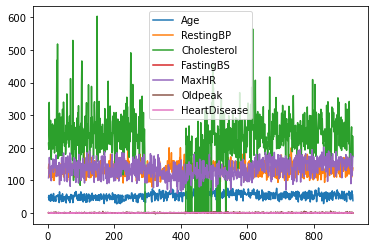

In [11]:
data.plot()
plt.show()

<AxesSubplot:>

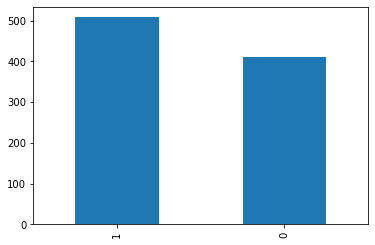

In [168]:
data['HeartDisease'].value_counts().plot(kind='bar')

# Extracting Independent & dependent Variable

In [12]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

# encode the Categorical Variable

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [14]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,6,8,10])], remainder='passthrough')

In [15]:
X=ct1.fit_transform(X)

In [16]:
X=pd.DataFrame(X)

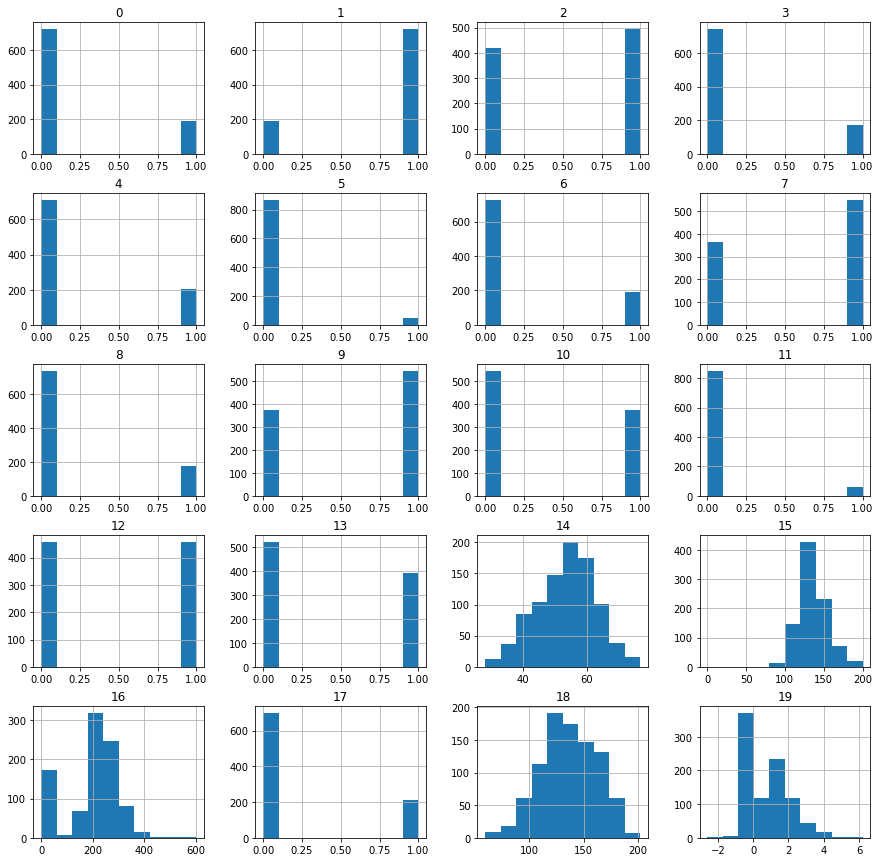

In [17]:
X.hist(figsize=(15,15))
plt.show()

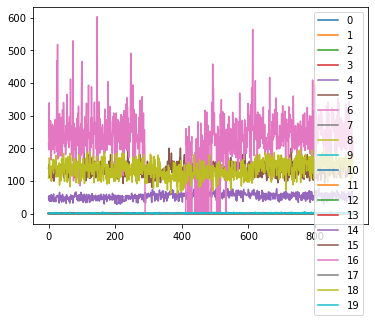

In [18]:
X.plot()
plt.show()

# Using Feature selection technique [RFE]

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [20]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

C:\Users\byral\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 5
Selected Features: [False  True  True False False False False False False False  True False
 False  True False False False  True False False]
Feature Ranking: [ 3  1  1  6  7  8 12 10  9  4  1 11  2  1 13 16 15  1 14  5]


C:\Users\byral\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\byral\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [21]:
fit

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [22]:
fit.n_features_

5

In [23]:
features = fit.transform(X)

In [24]:
d=pd.DataFrame(features)

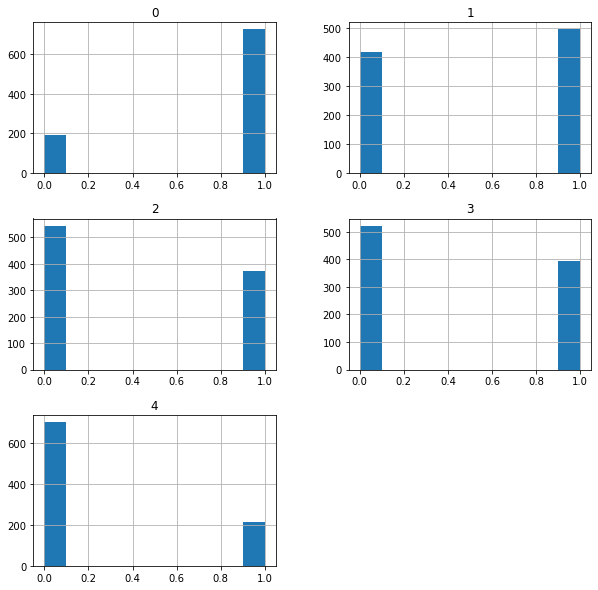

In [25]:
d.hist(figsize=(10,10))
plt.show()

# Splitting the data-set into Training and Test Set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 4)

In [27]:
X_train_d=pd.DataFrame(X_train)

In [221]:
X_train_d.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0


# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train

array([[2.42513103, 0.        , 0.        , 0.        , 2.35386811],
       [0.        , 2.0046821 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.02650383, 0.        ],
       ...,
       [2.42513103, 2.0046821 , 2.03872831, 0.        , 2.35386811],
       [2.42513103, 0.        , 0.        , 2.02650383, 0.        ],
       [2.42513103, 0.        , 0.        , 2.02650383, 0.        ]])

# Trainig Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
y_pred=classifier.predict(X_test)

# comparing Results

In [33]:
y_test=np.array(y_test)
y_pred=np.array(y_pred)

In [34]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.14207650273224043

# Checking for Accurecy

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[66 15]
 [11 91]]


0.8579234972677595

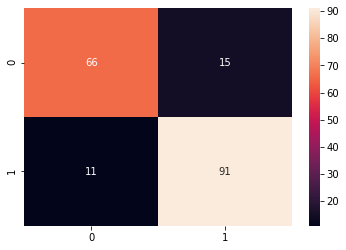

In [37]:
import seaborn as sa
sa.heatmap(cm, annot = True)
plt.show()

In [227]:
print('DecisionTreeClassifierModel Train Score is : ' , classifier.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , classifier.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.8664850136239782
DecisionTreeClassifierModel Test Score is :  0.8641304347826086


In [195]:
recall_score(y_test,y_pred)

0.9479166666666666

In [196]:
precision_score(y_test,y_pred)

0.8198198198198198

In [197]:
f1_score(y_test,y_pred)

0.8792270531400965

Feature: 0, Score: 0.07898
Feature: 1, Score: 0.22604
Feature: 2, Score: 0.04567
Feature: 3, Score: 0.57750
Feature: 4, Score: 0.07182


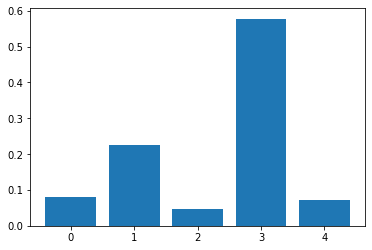

In [268]:
import matplotlib.pyplot as plt
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# checking for overfitting

In [231]:
from sklearn import linear_model 
Lasso_reg= linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)

In [232]:
Lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [233]:
Lasso_reg.score(X_train,y_train)

0.0

In [234]:
Lasso_reg.score(X_test,y_test)

-0.006274611973666744

# Ending our Project